# Load the required packages

In [1]:
import numpy as np
import pandas as pd
#Plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Mechine learning
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#Plot styling
import seaborn as sns; sns.set()
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# See the how the data distributes

In [2]:
#Load the data
dataset = pd.read_table('./蛋白表达模式聚类数据/data.txt',sep='\\s+')

In [3]:
#How the data looks
dataset.head()

,ID,P113V114,P115V114,P116V114,P117V114,P118V114,P119V114,P121V114
0,ARGI_SOYBN,0.742633,-0.134263,-0.412232,-1.369647,1.584927,-0.833394,0.421976
1,CONG7_ARAHY,0.897506,-1.007601,-0.160237,-1.622848,1.085557,0.316205,0.491418
2,GRC15_ORYSJ,1.638850,-0.266809,-0.716740,-1.480283,0.632424,-0.148190,0.340747
3,PHY_MOUSC,1.497008,-0.271991,-0.436068,-1.516897,1.064016,-0.116765,-0.219303
4,CONG_ARAHY,1.392901,-0.944591,-0.233938,-1.525234,0.799496,0.164667,0.346699


In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P113V114,54.0,-0.637995,1.068467,-2.195047,-1.560020,-0.874750,0.213208,1.638850
P115V114,54.0,-0.110931,0.730829,-1.149276,-0.844027,-0.233660,0.440093,1.215105
P116V114,54.0,-0.097066,0.825646,-1.586020,-0.763904,-0.266950,0.447451,1.607278
P117V114,54.0,-0.531627,0.802758,-1.717906,-1.227417,-0.576081,0.051259,1.040841
P118V114,54.0,0.866591,0.608790,-0.835003,0.646495,1.005909,1.240076,2.038515
P119V114,54.0,0.015245,0.782207,-2.048861,-0.376219,0.160175,0.643673,1.114270
P121V114,54.0,0.495784,0.623096,-0.929206,0.126779,0.642324,0.988432,1.356623


In [5]:
(dataset == 0).astype(int).sum(axis=0)

ID          0
P113V114    0
P115V114    0
P116V114    0
P117V114    0
P118V114    0
P119V114    0
P121V114    0
dtype: int64

Text(0.5, 0, 'Defferent Proteins')

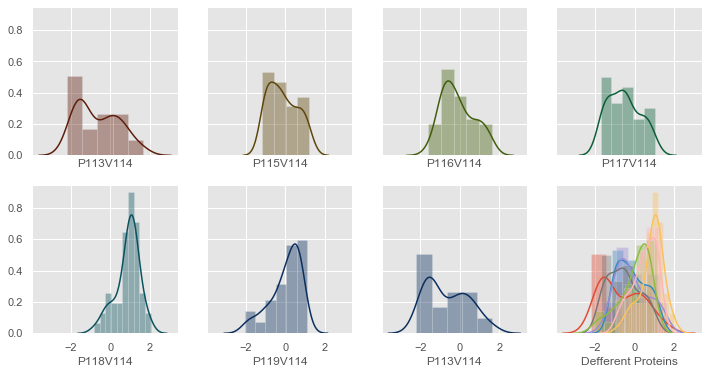

In [6]:
f, axes = plt.subplots(2,4, figsize=(12,6), sharex=True, sharey=True)
sns.distplot(dataset["P113V114"], ax = axes[0,0], color="#5e1c0a")
sns.distplot(dataset["P115V114"], ax = axes[0,1], color="#5e450a")
sns.distplot(dataset["P116V114"], ax = axes[0,2], color="#405e0a")
sns.distplot(dataset["P117V114"], ax = axes[0,3], color="#0a5e37")
sns.distplot(dataset["P118V114"], ax = axes[1,0], color="#0a525e")
sns.distplot(dataset["P119V114"], ax = axes[1,1], color="#0a2e5e")
sns.distplot(dataset["P113V114"], ax = axes[1,2], color="#0a2e5e")

sns.distplot(dataset["P113V114"])
sns.distplot(dataset["P115V114"])
sns.distplot(dataset["P116V114"])
sns.distplot(dataset["P117V114"])
sns.distplot(dataset["P118V114"])
sns.distplot(dataset["P119V114"])
sns.distplot(dataset["P121V114"])
plt.xlabel('Defferent Proteins')

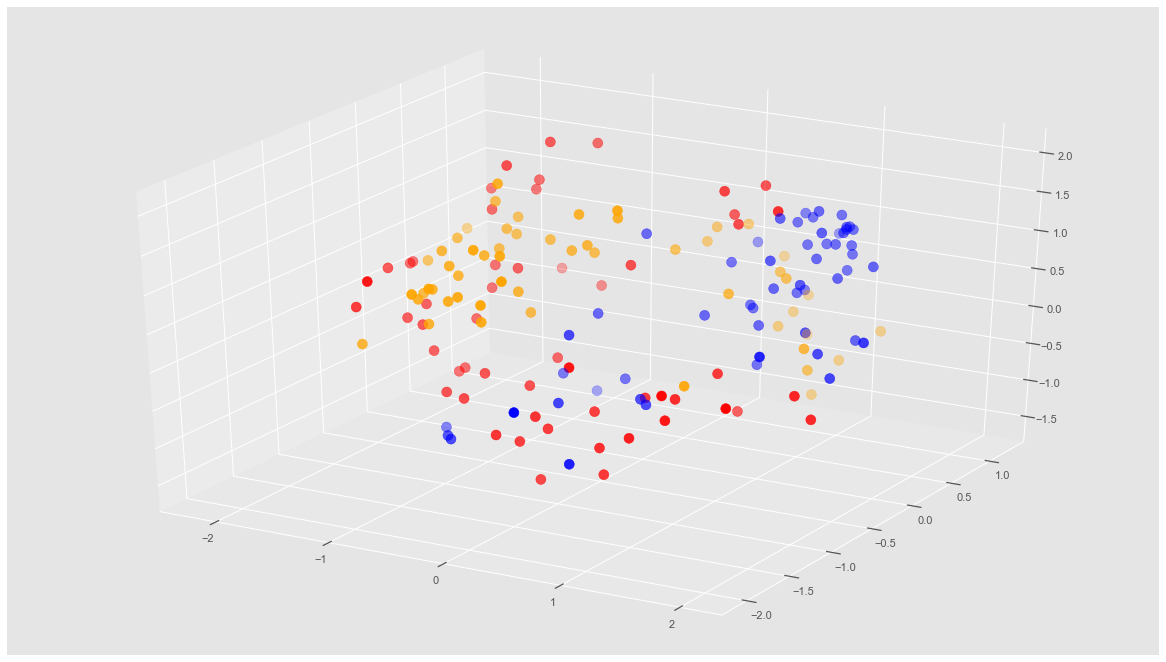

In [7]:
# Plotting the values to understand the spread

P113V114 = dataset['P113V114'].values
P115V114 = dataset['P115V114'].values
P116V114 = dataset['P116V114'].values
P117V114 = dataset['P117V114'].values
P118V114 = dataset['P118V114'].values
P119V114 = dataset['P119V114'].values
P121V114 = dataset['P121V114'].values
##plot in 3D space

fig = plt.figure()
ax3 = Axes3D(fig)
ax3.scatter(P113V114, P115V114, P116V114, c='red', s=100)
ax3.scatter(P116V114, P117V114, P118V114, c='orange', s=100)
ax3.scatter(P118V114, P119V114, P121V114, c='blue', s=100)


# Find the $K$ to implement the clustering

In [8]:
#get the input values
input = dataset.iloc[:,[1,2,3,4,5,6,7]].values

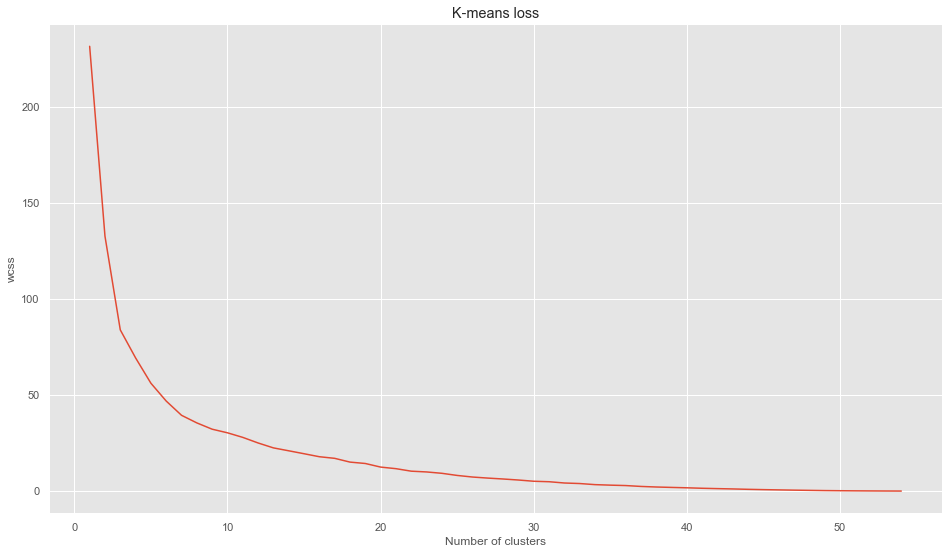

In [9]:
#Try different "K", and find the loss
wcss = []
for i in range(1,55):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(input)
    wcss.append(km.inertia_)
plt.plot(range(1,55),wcss)
plt.title('K-means loss')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

------
## Note
The parameter ``ineria_`` means $\sum_{i=0}^{n} \min _{\mu_{j} \in C}\left(\left\|x_{i}-\mu_{j}\right\|^{2}\right)$, it is the target to be minimized. It suffers from the following drawbacks.
- Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.
------
### As we can see, the more the clustering number is, the lee loss we will get. But the model will be too complicate if the number is too large. We can try $K=5$ after serval trials.


# $K-means$ clustering
1. Define $k = number\ of\ clusters$.
2. Randomly initialize each cluster with a seed (often with a random gene).
3. Assign each gene to the cluster with the most similar seed.
4. Recalculate all cluster seeds as means (or medians) of genes assigned to the cluster.
5. Repeat **Step 3** and **Step 4** until convergence.

In [10]:
#Fitting kmeans to the dataset
km=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(input)
print(y_means)

[4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 2 2 2 3 3
 2 3 3 2 1 1 0 1 1 1 1 1 1 1 1 1 1]


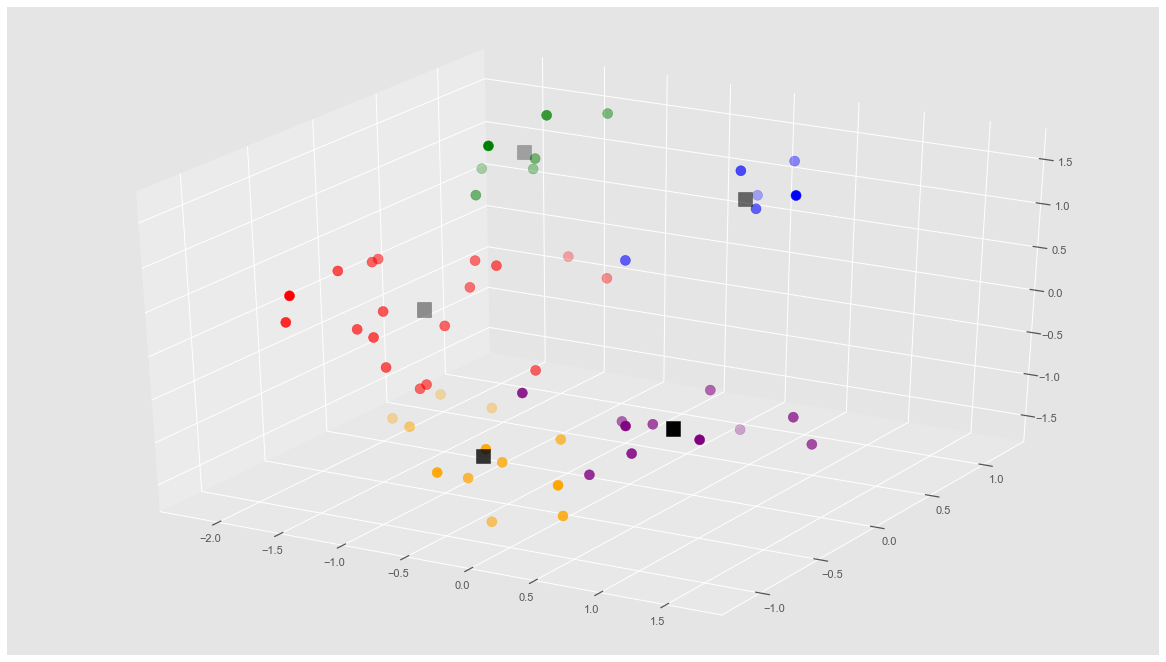

In [11]:
#Visualising the clusters(three-dimensional space)
fig = plt.figure()
ax3 = Axes3D(fig)
ax3.scatter(input[y_means==0,0], input[y_means==0,1], input[y_means==0,2], c='red', s=100)
ax3.scatter(input[y_means==1,0], input[y_means==1,1], input[y_means==1,2], c='orange', s=100)
ax3.scatter(input[y_means==2,0], input[y_means==2,1], input[y_means==2,2], c='blue', s=100)
ax3.scatter(input[y_means==3,0], input[y_means==3,1], input[y_means==3,2], c='green', s=100)
ax3.scatter(input[y_means==4,0], input[y_means==4,1], input[y_means==4,2], c='purple', s=100)
#Centers
ax3.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2], s=200, color='black', marker='s')

# Hierarchical clustering
1. Suppose there are $N$ observations, consider these $N$ observations as $N$ classes, and each class contains one observation, whose distance matrix is $D_N =\{d_{ij} \}$.
2. Find the smallest distance $d_{uv}$ in the distance matrix and merge them into one group$(uv)$.
3. Find the distance matrix between the group$(uv)$ and the remaining observations$(D_{N-1})$.
4. Repeat **Step 2** and **Step 3**, and finally merge all observations into a large group.

In [12]:
#Hierarchical clustering
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(input)
print(y_hc)

[2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 1 1 1 1 3 3
 1 3 3 1 0 4 0 4 0 0 4 0 4 4 4 4 4]


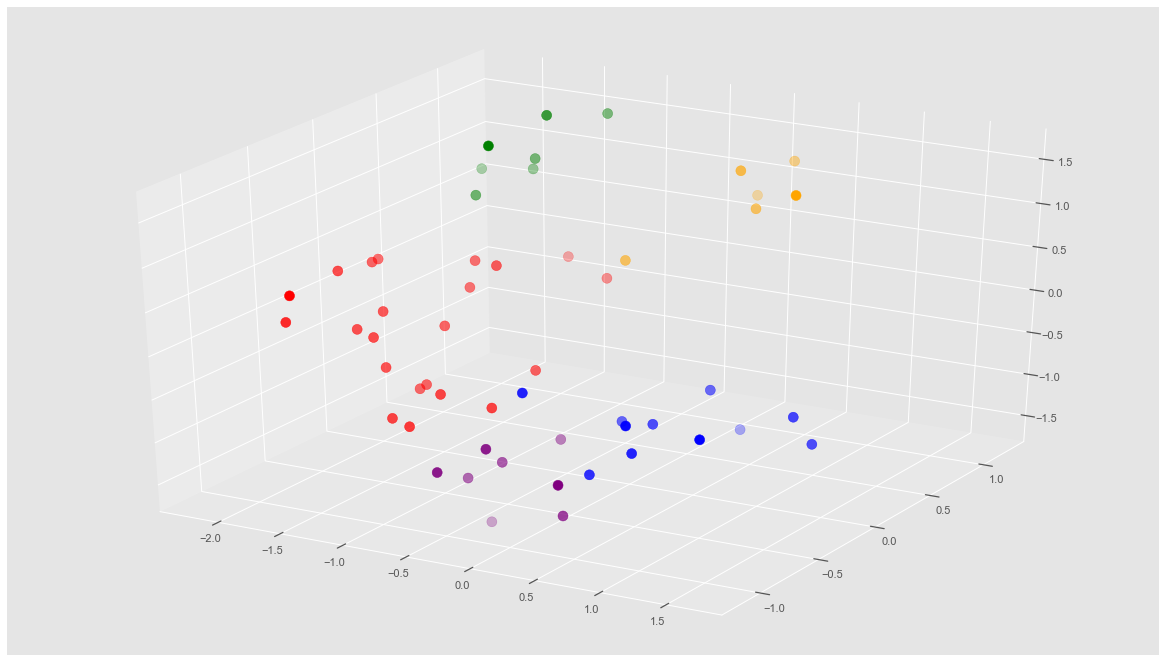

In [13]:
#Visualising the clusters(three-dimensional space)
fig = plt.figure()
ax3 = Axes3D(fig)
ax3.scatter(input[y_hc==0,0], input[y_hc==0,1], input[y_hc==0,2], c='red', s=100)
ax3.scatter(input[y_hc==1,0], input[y_hc==1,1], input[y_hc==1,2], c='orange', s=100)
ax3.scatter(input[y_hc==2,0], input[y_hc==2,1], input[y_hc==2,2], c='blue', s=100)
ax3.scatter(input[y_hc==3,0], input[y_hc==3,1], input[y_hc==3,2], c='green', s=100)
ax3.scatter(input[y_hc==4,0], input[y_hc==4,1], input[y_hc==4,2], c='purple', s=100)

## Study Notebook
**The agglomerative methods includes:**

- Single linkage clustering

  The linkage function of the distance $D(X,Y)$ between clusters $X$ and $Y$ is described by the expression:
  $$
  D(X, Y)=\min _{x \in X, y \in Y} d(x, y)
  $$

  - $X$ and $Y$ are any two sets of elements considered as clusters.
  - $d(x,y)$ denotes the distance between the two elements $x$ and $y$.

- Complete linkage clustering

  The linkage function of the distance $D(X,Y)$ between clusters $X$ and $Y$ is described by the expression:
  $$
  D(X, Y)=\max _{x \in X, y \in Y} d(x, y)
  $$

  - $X$ and $Y$ are any two sets of elements considered as clusters.
  - $d(x,y)$ denotes the distance between the two elements $x$ and $y$.

- Group-average clustering

  The linkage function of the distance $D(X,Y)$ between clusters $X$ and $Y$ is described by the expression:
  $$
  D(X, Y)=T_{XY} /\left(N_{X} * N_{Y}\right)
  $$

  - $X$ and $Y$ are any two sets of elements considered as clusters.
  - $T_{XY}$ denotes the sum of all pairwise distances between cluster $X$ and cluster $Y$.
  - $N_X$ and $N_Y$ are the sizes of the clusters $X$ and $Y$, respectively.

- Centroid clustering

  The linkage function of the distance $D(X,Y)$ between clusters $X$ and $Y$ is described by the expression:
  $$
  D(X, Y)=\mu_X-\mu_Y
  $$

  - $X$ and $Y$ are any two sets of elements considered as clusters.
  - $\mu_{M}=\frac{1}{\left|C_{M}\right|} \sum_{k=C_{M}} x$, denoted as the cretroid of clustering $M$.

- Median clustering

  The linkage function of the distance $D(X,Y)$ between clusters $X$ and $Y$ is described by the expression:
  $$
  D(X, Y)=d(\sigma_X,\sigma_Y)
  $$

  - $X$ and $Y$ are any two sets of elements considered as clusters.
  - $d(x,y)$ denotes the distance between the two elements $x$ and $y$.
  - $\sigma_M$ denotes the median of clustering $M$.